# Superposition and Entanglement in Qiskit
This notebook demonstrates:
1. **Superposition** using a single qubit.
2. **Entanglement** using two qubits.
We will use Qiskit to create circuits, visualize the states, and measure outcomes.

In [1]:
# ===========================
# Install Qiskit, Aer and pylatexenc
# ===========================
!pip install qiskit --quiet
!pip install qiskit-aer --quiet



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 67.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 85.0 MB/s eta 0:00:00


In [2]:
# ===========================
# Import Libraries
# ===========================
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt


## 1. Superposition Example

In [3]:
# ===========================
# Superposition Example
# ===========================
# Create 1-qubit circuit
qc_super = QuantumCircuit(1)

# Apply Hadamard gate to create superposition
qc_super.h(0)

# Draw the circuit
qc_super.draw('text')

# Get statevector
state_super = Statevector.from_instruction(qc_super)
plot_bloch_multivector(state_super)
plt.show()

# Measure and simulate
qc_super.measure_all()
simulator = AerSimulator()
job_super = simulator.run(qc_super, shots=1024)
result_super = job_super.result()
counts_super = result_super.get_counts()
print("Superposition Measurement Counts:", counts_super)
plot_histogram(counts_super)
plt.show()

Superposition Measurement Counts: {'0': 493, '1': 531}


## 2. Entanglement Example

In [4]:
# ===========================
# Entanglement Example
# ===========================
# Create 2-qubit circuit
qc_ent = QuantumCircuit(2)

# Apply Hadamard on qubit 0
qc_ent.h(0)

# Apply CNOT to entangle qubit 0 and 1
qc_ent.cx(0, 1)

# Draw the circuit
qc_ent.draw('text')

# Get statevector
state_ent = Statevector.from_instruction(qc_ent)
print("Entangled Statevector:", state_ent)
plot_bloch_multivector(state_ent)
plt.show()

# Measure and simulate
qc_ent.measure_all()
job_ent = simulator.run(qc_ent, shots=1024)
result_ent = job_ent.result()
counts_ent = result_ent.get_counts()
print("Entanglement Measurement Counts:", counts_ent)
plot_histogram(counts_ent)
plt.show()

Entangled Statevector: Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))
Entanglement Measurement Counts: {'00': 540, '11': 484}


{'1': 506, '0': 518}


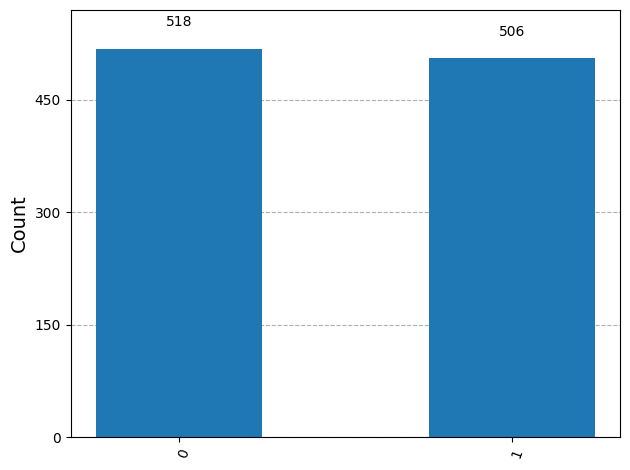

In [28]:
#Task 1: Superposition

from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit
qc = QuantumCircuit(1, 1)   # 1 qubit, 1 classical bit
qc.h(0)   # Apply Hadamard on qubit 0
qc.measure(0, 0)   # Measure qubit 0 and store in classical bit 0

sim = AerSimulator()
job = sim.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()
print(counts)

plot_histogram(counts)

# Yes from the histogram we obeserve Hadamard gate gives ~50% split

Entanglement Measurement Counts: {'00 00': 512, '11 00': 512}


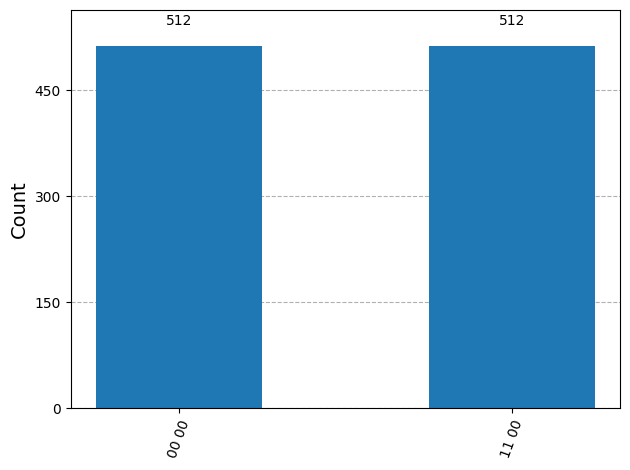

In [55]:
#Task 2: Entanglement

from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Create 2-qubit circuit
qc_ent = QuantumCircuit(2, 2) #2 qubits and 2 classical bits to measure

# Hadamard on qubit 0
qc_ent.h(0) #superposition

# CNOT (control=0, target=1)
qc_ent.cx(0, 1) #entanglement / bell state

# Measure both
qc_ent.measure_all()

# Run simulation
sim = AerSimulator()
job = sim.run(qc_ent, shots=1024)
result = job.result()
counts = result.get_counts()

# Display
print("Entanglement Measurement Counts:", counts) #Outcome is correlated 00 or 11 (entangled)
plot_histogram(counts)

